In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
seq_names = ["160906_band2", "170307_dance5", "170915_office1", "160906_pizza1", "170915_toddler4"]
seq_names_short = ["band2", "dance5", "office1", "pizza1", "toddler4"]
logids = [1, 0, 2, 1, 0]


In [17]:
pssim_kpcull_dict = {}
for seq_name, logid in zip(seq_names, logids):
    path = f"/datassd/pipeline/client_tiled/ablation/{seq_name}_with_ground/3D_pssim_{seq_name}_with_ground_o3d_nvenc_s_kpcull_c_cull_tracep1_log{logid}.csv"

    df = pd.read_csv(path)
    pssim_kpcull_dict[seq_name] = {
        "mean_geo": df['PSSIM_GEO_BA'].mean(),
        "std_geo": df['PSSIM_GEO_BA'].std(),
        "mean_color": df['PSSIM_COLOR_BA'].mean(),
        "std_color": df['PSSIM_COLOR_BA'].std()
    }

pssim_pcull_dict = {}
for seq_name, logid in zip(seq_names, logids):
    path = f"/datassd/pipeline/client_tiled/ablation/{seq_name}_with_ground/3D_pssim_{seq_name}_with_ground_o3d_nvenc_s_pcull_c_cull_tracep1_log{logid}.csv"

    df = pd.read_csv(path)
    pssim_pcull_dict[seq_name] = {
        "mean_geo": df['PSSIM_GEO_BA'].mean(),
        "std_geo": df['PSSIM_GEO_BA'].std(),
        "mean_color": df['PSSIM_COLOR_BA'].mean(),
        "std_color": df['PSSIM_COLOR_BA'].std()
    }

In [24]:
import json
print(json.dumps(pssim_kpcull_dict, indent=4))

{
    "160906_band2": {
        "mean_geo": 90.09727272727275,
        "std_geo": 1.4327549925534613,
        "mean_color": 78.86909090909091,
        "std_color": 2.3660102945263604
    },
    "170307_dance5": {
        "mean_geo": 89.38171717171718,
        "std_geo": 1.5152409658196417,
        "mean_color": 91.24969696969697,
        "std_color": 3.726305401876227
    },
    "170915_office1": {
        "mean_geo": 88.66836363636364,
        "std_geo": 1.4345740929916533,
        "mean_color": 82.32127272727273,
        "std_color": 5.4366891662949675
    },
    "160906_pizza1": {
        "mean_geo": 90.32142857142857,
        "std_geo": 0.9374093362753871,
        "mean_color": 78.28785714285713,
        "std_color": 4.765283393899656
    },
    "170915_toddler4": {
        "mean_geo": 91.4264864864865,
        "std_geo": 1.2335657803840594,
        "mean_color": 88.74891891891893,
        "std_color": 2.394540994966798
    }
}


In [25]:
import json
print(json.dumps(pssim_pcull_dict, indent=4))

{
    "160906_band2": {
        "mean_geo": 90.45927272727275,
        "std_geo": 0.9103862724048324,
        "mean_color": 79.32945454545454,
        "std_color": 2.1498134442592556
    },
    "170307_dance5": {
        "mean_geo": 89.98545454545452,
        "std_geo": 1.0445214437158243,
        "mean_color": 91.9881818181818,
        "std_color": 3.2141991618938475
    },
    "170915_office1": {
        "mean_geo": 89.09872727272732,
        "std_geo": 1.2216322634923278,
        "mean_color": 82.84509090909093,
        "std_color": 5.19332722604379
    },
    "160906_pizza1": {
        "mean_geo": 90.48833333333334,
        "std_geo": 0.7594236251422819,
        "mean_color": 77.79000000000002,
        "std_color": 5.038776907868884
    },
    "170915_toddler4": {
        "mean_geo": 91.60324324324323,
        "std_geo": 0.6778235351068495,
        "mean_color": 89.02594594594595,
        "std_color": 2.649154434762009
    }
}


In [33]:
# Difference between kpcull and pcull
diff_dict = {}
for seq_name in seq_names:
    diff_dict[seq_name] = {
        "mean_geo": pssim_kpcull_dict[seq_name]["mean_geo"] - pssim_pcull_dict[seq_name]["mean_geo"],
        "std_geo": pssim_kpcull_dict[seq_name]["std_geo"] - pssim_pcull_dict[seq_name]["std_geo"],
        "mean_color": pssim_kpcull_dict[seq_name]["mean_color"] - pssim_pcull_dict[seq_name]["mean_color"],
        "std_color": pssim_kpcull_dict[seq_name]["std_color"] - pssim_pcull_dict[seq_name]["std_color"]
    }

# Average difference in percent
diff_dict_percent = {}
for seq_name in seq_names:
    diff_dict_percent[seq_name] = {
        "mean_geo": diff_dict[seq_name]["mean_geo"] / pssim_kpcull_dict[seq_name]["mean_geo"] * 100,
        "std_geo": diff_dict[seq_name]["std_geo"] / pssim_kpcull_dict[seq_name]["std_geo"] * 100,
        "mean_color": diff_dict[seq_name]["mean_color"] / pssim_kpcull_dict[seq_name]["mean_color"] * 100,
        "std_color": diff_dict[seq_name]["std_color"] / pssim_kpcull_dict[seq_name]["std_color"] * 100
    }

print(json.dumps(diff_dict_percent, indent=4))

{
    "160906_band2": {
        "mean_geo": -0.40178796654120713,
        "std_geo": 36.459040300928315,
        "mean_color": -0.5837060260961622,
        "std_color": 9.137612408841363
    },
    "170307_dance5": {
        "mean_geo": -0.6754595826095524,
        "std_geo": 31.06565442211301,
        "mean_color": -0.8093011516850004,
        "std_color": 13.74300237775813
    },
    "170915_office1": {
        "mean_geo": -0.4853632329661986,
        "std_geo": 14.84355743907641,
        "mean_color": -0.6363096250389494,
        "std_color": 4.476289388768302
    },
    "160906_pizza1": {
        "mean_geo": -0.18478977197839808,
        "std_geo": 18.986978713087783,
        "mean_color": 0.6359314982253772,
        "std_color": -5.739291692900045
    },
    "170915_toddler4": {
        "mean_geo": -0.1933321114585948,
        "std_geo": 45.05169113107083,
        "mean_color": -0.3121469313672536,
        "std_color": -10.633079171765916
    }
}


/tmp/ipykernel_1012393/1865961178.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 101, 20), fontsize=14)


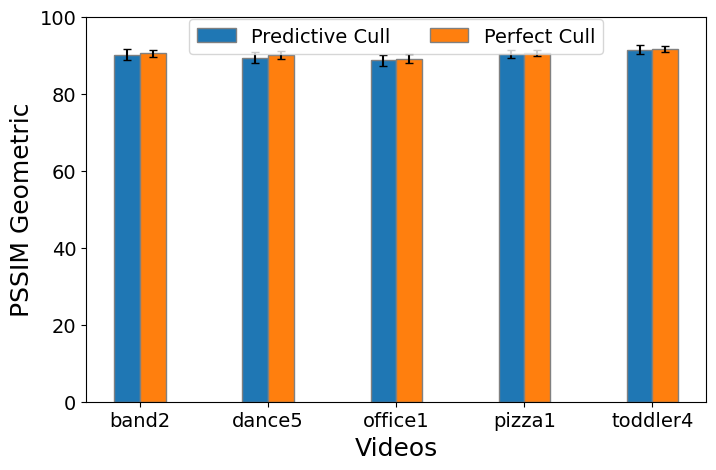

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

barWidth = 0.2

r1 = np.arange(len(seq_names))
r2 = np.array([x + barWidth for x in r1])

mean_kpcull_geo = [pssim_kpcull_dict[seq_name]["mean_geo"] for seq_name in seq_names]
std_kpcull_geo = [pssim_kpcull_dict[seq_name]["std_geo"] for seq_name in seq_names]
ax.bar(r1, mean_kpcull_geo, yerr=std_kpcull_geo, width=barWidth, edgecolor='grey', label='Predictive Cull', capsize=3)

mean_pcull_geo = [pssim_pcull_dict[seq_name]["mean_geo"] for seq_name in seq_names]
std_pcull_geo = [pssim_pcull_dict[seq_name]["std_geo"] for seq_name in seq_names]
ax.bar(r2, mean_pcull_geo, yerr=std_pcull_geo, width=barWidth, edgecolor='grey', label='Perfect Cull', capsize=3)

ax.set_xticks(r1 + barWidth/2)
ax.set_xticklabels(seq_names_short)
ax.set_ylabel('PSSIM Geometric', fontsize=18)
ax.set_xlabel('Videos', fontsize=18)
ax.set_ylim(0, 100)
ax.set_yticklabels(np.arange(0, 101, 20), fontsize=14)
ax.set_xticklabels(seq_names_short, fontsize=14)
ax.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=14)
plt.show()

# Save figure to pdf file
# fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_geo_starline_livo.pdf', bbox_inches='tight')

# Comment: We get quality imporvement as a result of culling

/tmp/ipykernel_1012393/1369781097.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 101, 20), fontsize=14)


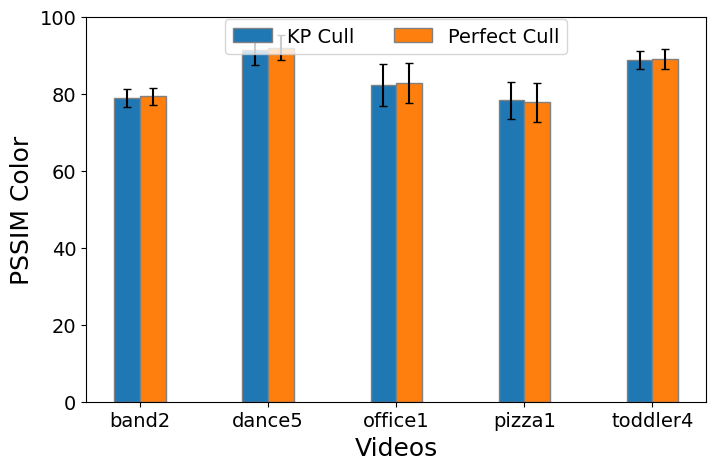

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

barWidth = 0.2

r1 = np.arange(len(seq_names))
r2 = np.array([x + barWidth for x in r1])

mean_kpcull_color = [pssim_kpcull_dict[seq_name]["mean_color"] for seq_name in seq_names]
std_kpcull_color = [pssim_kpcull_dict[seq_name]["std_color"] for seq_name in seq_names]
ax.bar(r1, mean_kpcull_color, yerr=std_kpcull_color, width=barWidth, edgecolor='grey', label='KP Cull', capsize=3)

mean_pcull_color = [pssim_pcull_dict[seq_name]["mean_color"] for seq_name in seq_names]
std_pcull_color = [pssim_pcull_dict[seq_name]["std_color"] for seq_name in seq_names]
ax.bar(r2, mean_pcull_color, yerr=std_pcull_color, width=barWidth, edgecolor='grey', label='Perfect Cull', capsize=3)

ax.set_xticks(r1 + barWidth/2)
ax.set_xticklabels(seq_names_short)
ax.set_ylabel('PSSIM Color', fontsize=18)
ax.set_xlabel('Videos', fontsize=18)
ax.set_ylim(0, 100)
ax.set_yticklabels(np.arange(0, 101, 20), fontsize=14)
ax.set_xticklabels(seq_names_short, fontsize=14)
ax.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=14)
plt.show()

# Save figure to pdf file
# fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_color_starline_livo.pdf', bbox_inches='tight')

# Comment: We get quality imporvement as a result of culling